In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from chapter_04.utils import *

random.seed(0)

## Defining our dataset

Plotting the polynomial $-x^2+1$

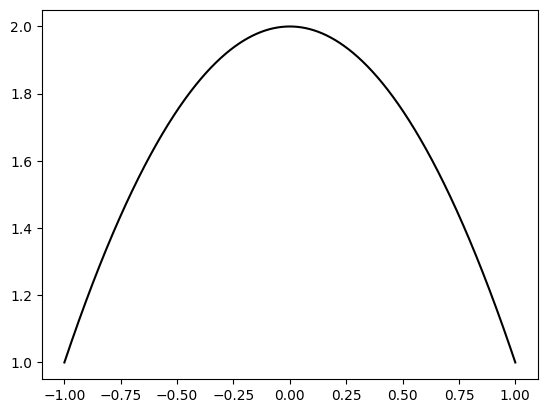

In [30]:
# Our original polynomial is -x^2+1
coefs = [2,0,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    #plt.ylim(0,3)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [31]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

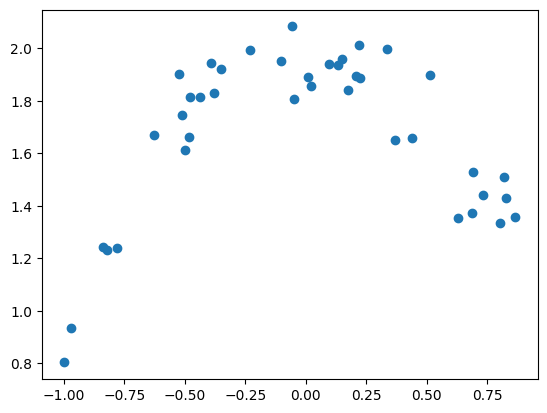

In [32]:
plt.scatter(X, Y)

## Training a polynomial regression model

Let's plot a polynomial of degree 30 to our dataset. Notice how much it overfits!

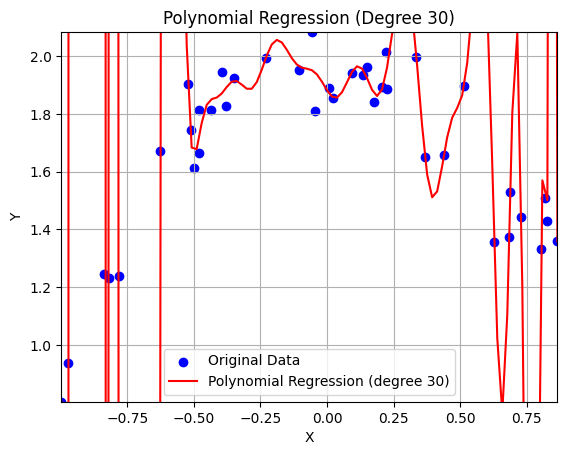

Polynomial Regression (Degree 30) Coefficients: [-1.42928125e+09 -1.47602466e+00  1.04883686e+01  3.24184492e+02
 -1.95353435e+02 -2.53616787e+04 -1.58380984e+04  8.73571847e+05
  8.00987680e+05 -1.61549114e+07 -1.56159474e+07  1.81642423e+08
  1.68262932e+08 -1.33617999e+09 -1.13330082e+09  6.70686371e+09
  5.07588984e+09 -2.34775823e+10 -1.56474465e+10  5.77067691e+10
  3.37973883e+10 -9.89128520e+10 -5.13424401e+10  1.15499298e+11
  5.41254512e+10 -8.74242663e+10 -3.79879579e+10  3.86266565e+10
  1.60661228e+10 -7.55757523e+09 -3.10966216e+09]
Polynomial Regression (Degree 30) Intercept: 1429281250.125449


In [33]:
degree_used = 30

# Example usage with the existing data X and Y
weights_degree_used, intercept_degree_used = train_and_plot_polynomial_regression(X, Y, 30)
print(f"Polynomial Regression (Degree {degree_used}) Coefficients: {weights_degree_used}")
print(f"Polynomial Regression (Degree {degree_used}) Intercept: {intercept_degree_used}")

## Splitting data into training and testing


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", np.shape(X_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of Y_train:", np.shape(Y_train))
print("Shape of Y_test:", np.shape(Y_test))

Shape of X_train: (32,)
Shape of X_test: (8,)
Shape of Y_train: (32,)
Shape of Y_test: (8,)


## Training a polynomial regression model with no regularization


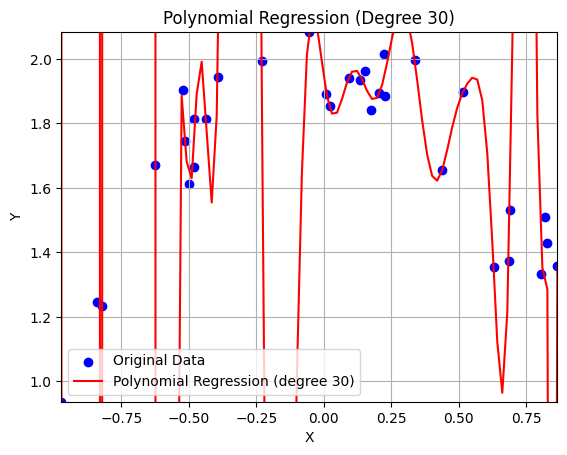

In [35]:
coefficients_and_intercept = train_and_plot_polynomial_regression(X_train, Y_train, degree_used)


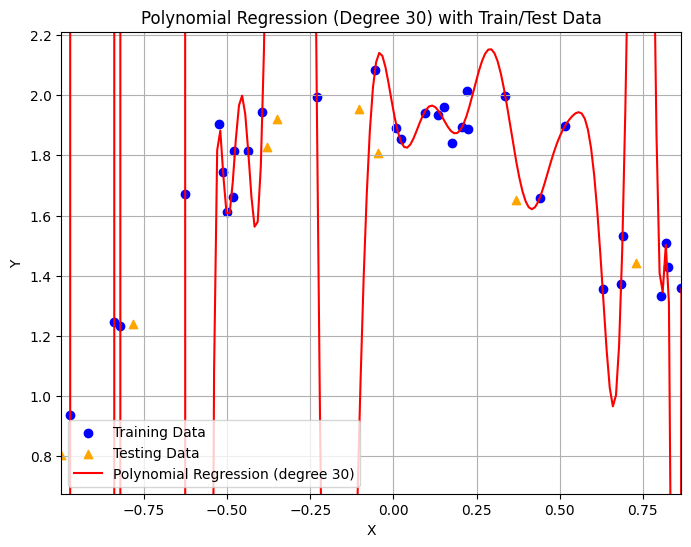

Square loss on the test set (degree 30): 400200682224778.3


In [36]:
square_loss = predict_and_evaluate(coefficients_and_intercept, degree_used, X_train, Y_train, X_test, Y_test)
print(f"Square loss on the test set (degree {degree_used}): {square_loss}")

## Training a polynomial regression model with L1 regularization


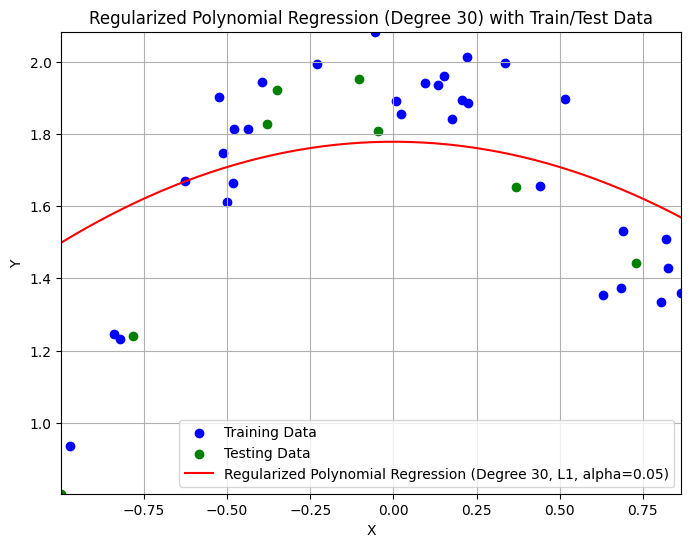

RMSE with L1 Regularization (degree 30, alpha=0.05): 0.30274488783337344


In [37]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L1 (Lasso) regularization
rmse_lasso = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L1', alpha=alpha_value)
print(f"RMSE with L1 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_lasso}")

## Training a polynomial regression model with L2 regularization


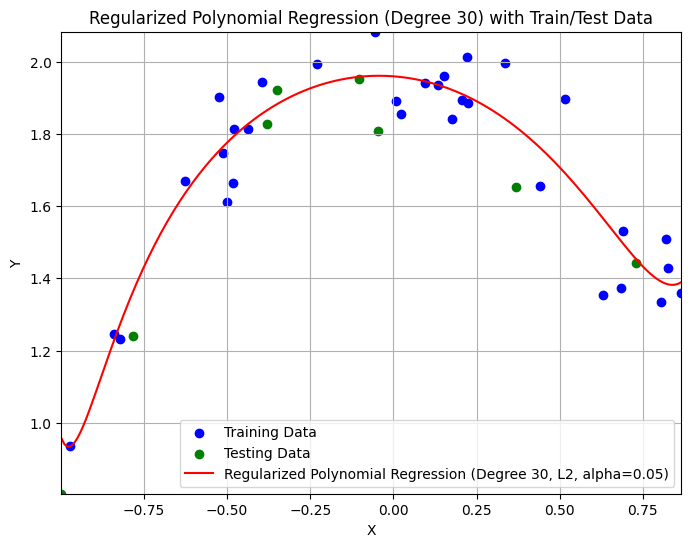

RMSE with L2 Regularization (degree 30, alpha=0.05): 0.10800013182491401


In [38]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L2 (Ridge) regularization
rmse_ridge = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L2', alpha=alpha_value)
print(f"RMSE with L2 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_ridge}")